In [0]:
import cv2
import os
import json
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase
import matplotlib.animation as animation

In [0]:
with open('INDIA/data.json') as json_file:
    data = json.load(json_file)

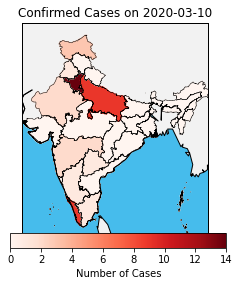

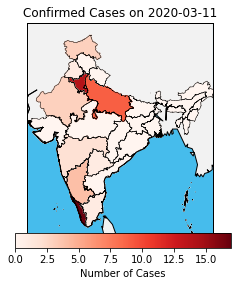

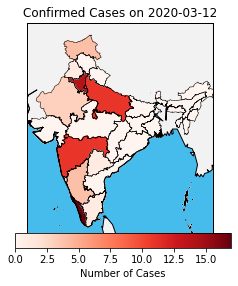

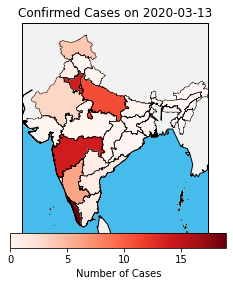

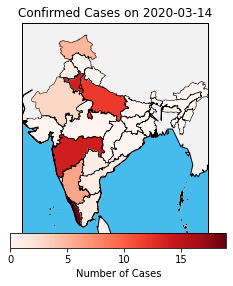

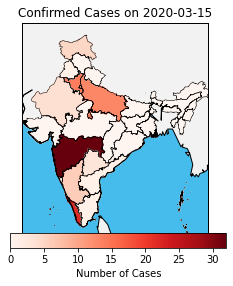

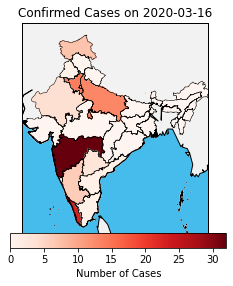

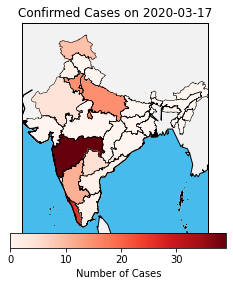

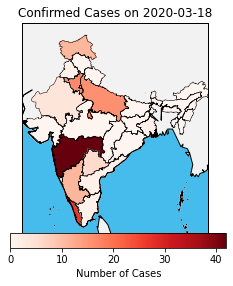

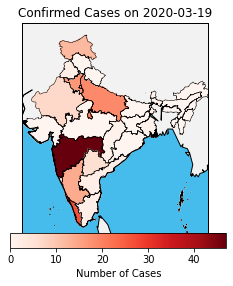

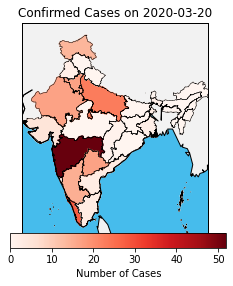

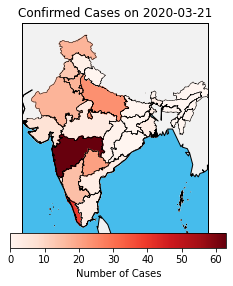

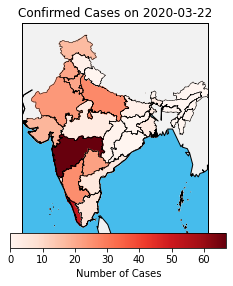

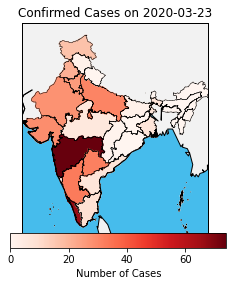

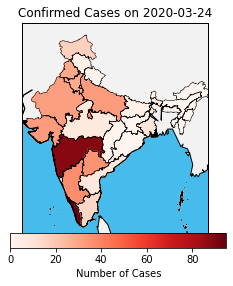

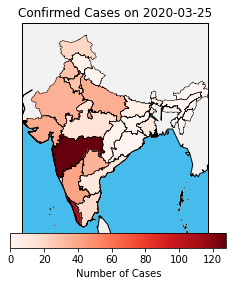

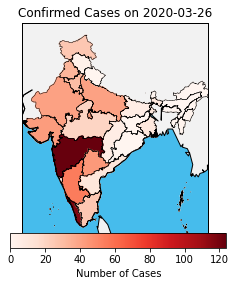

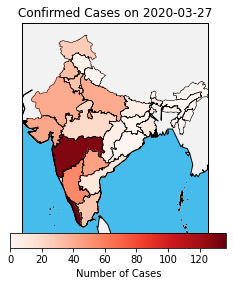

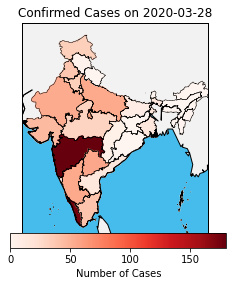

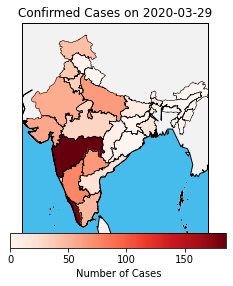

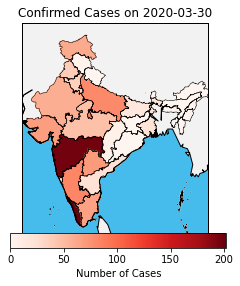

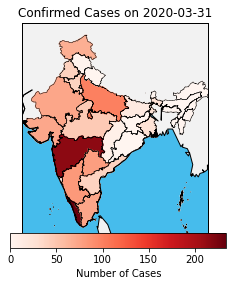

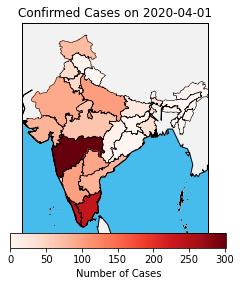

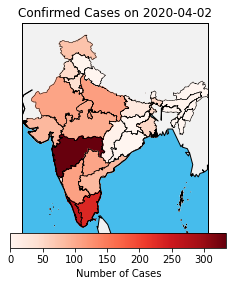

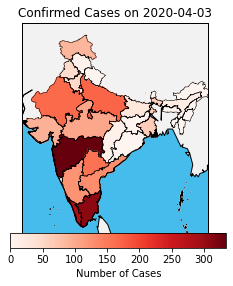

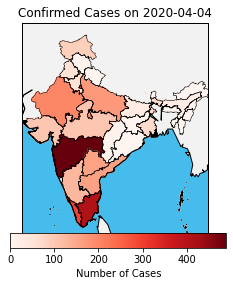

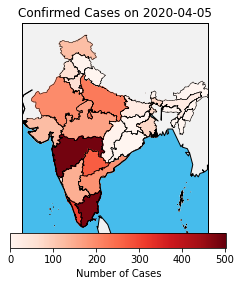

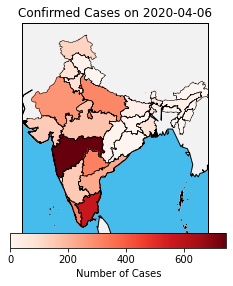

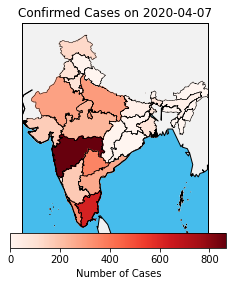

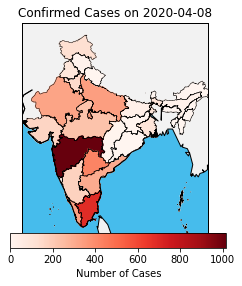

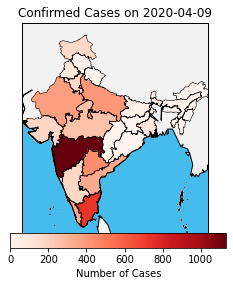

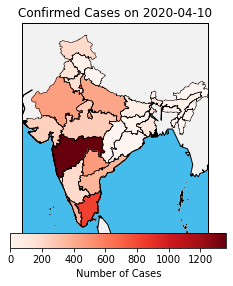

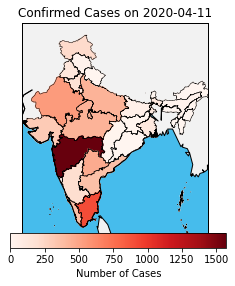

In [5]:
#Color bar depends on Confirmed Cases on that Day
folder = "IMAGES"
for ind in range(len(data['data'])):
  color_dict = {}
  color_list = ["Andaman and Nicobar","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Dadra and Nagar Haveli","Daman and Diu","Delhi","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Orissa","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telengana","Tripura","Uttar Pradesh","Uttaranchal","West Bengal",]
  for j in range(len(data['data'][ind]['regional'])):
      color_dict[data['data'][ind]['regional'][j]['loc']] = data['data'][ind]['regional'][j]['totalConfirmed']
  for j in color_list:
    if j not in color_dict.keys():
      color_dict[j] = 0
  #As our coordinates do not incorporate seperation of Ladakh from Jammu & Kashmir 
  color_dict["Jammu and Kashmir"] += color_dict["Ladakh"]
  del color_dict["Ladakh"] 

  fig, ax = plt.subplots()
  #Obtain position coordinates from https://boundingbox.klokantech.com/
  m = Basemap(resolution='c',projection='merc',lat_0=54.5,lon_0=-4.36,llcrnrlon=68., llcrnrlat=6., urcrnrlat=37., urcrnrlon=97.)
  m.drawmapboundary(fill_color='#46bcec')
  m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
  m.drawcoastlines()
  #contains all state position coordinates
  m.readshapefile("INDIA/IND_adm1","INDIA")

  colors={}
  statenames=[]
  patches = []
  #Colormap
  cmap = plt.cm.Reds
  #Colorbar Range
  vmin = min(color_dict.values()); vmax = max(color_dict.values())
  norm = Normalize(vmin=vmin, vmax=vmax)
  # color mapper to covert values to colors
  mapper = ScalarMappable(norm=norm, cmap=cmap)

  for shapedict in m.INDIA_info:
      statename = shapedict['NAME_1']
      #To incorporate difference between Map State Name and Data Loc Name
      if statename == "Telangana":
        statename = "Telengana"
      if statename in color_dict:
          pop = color_dict[statename]
          colors[statename] = mapper.to_rgba(pop)
          statenames.append(statename)

  for nshape,seg in enumerate(m.INDIA):
      color = rgb2hex(colors[statenames[nshape]]) 
      poly = Polygon(seg,facecolor=color,edgecolor=color)
      ax.add_patch(poly)
  plt.title('Confirmed Cases on '+ data['data'][ind]['day'])

  cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon
  cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
  cb.ax.set_xlabel('Number of Cases')
  fig1 = plt.gcf()
  plt.show()
  fig1.savefig(folder + "/file%02d.png" % ind)

video_name = 'time_map.avi'

images = [img for img in os.listdir(folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(folder, images[0]))
height, width, layers = frame.shape

#0.7 is the fps (frame per second)
video = cv2.VideoWriter(video_name, 0, 0.7, (width,height))

for image in sorted(images):
    video.write(cv2.imread(os.path.join(folder, image)))

cv2.destroyAllWindows()
video.release()

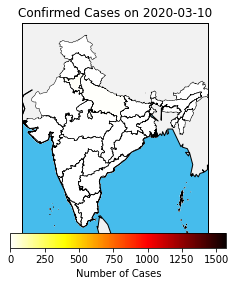

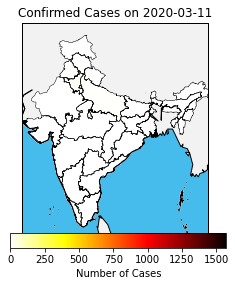

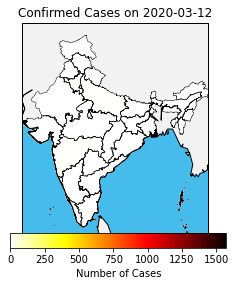

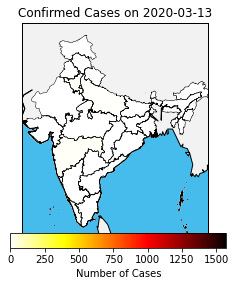

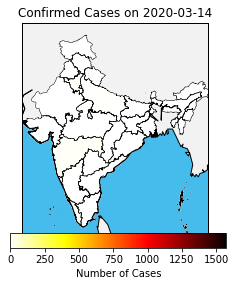

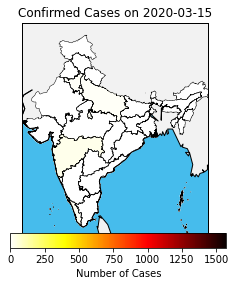

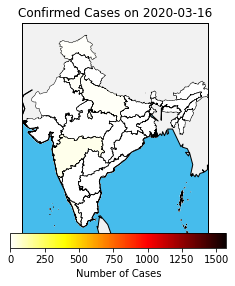

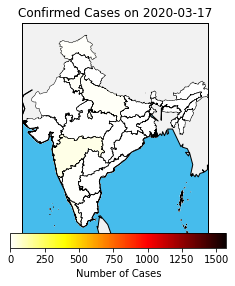

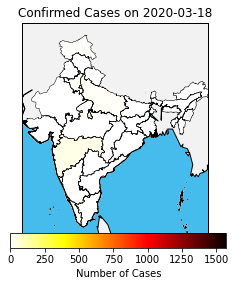

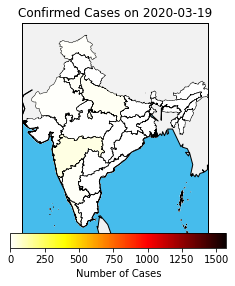

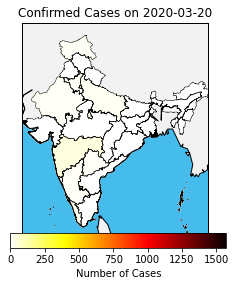

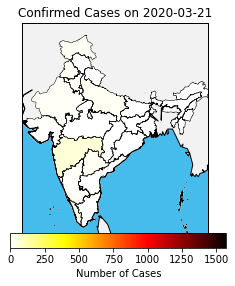

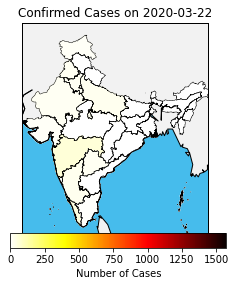

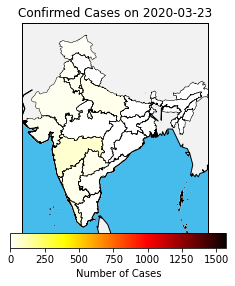

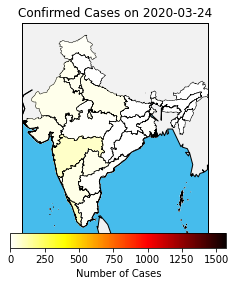

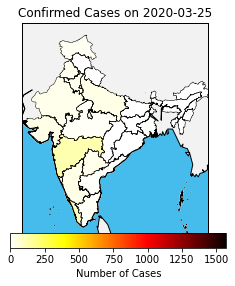

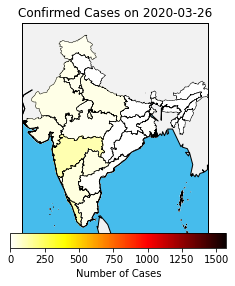

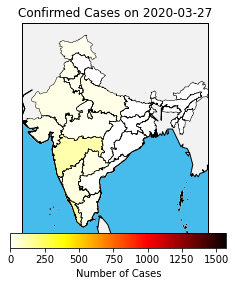

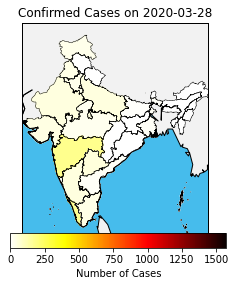

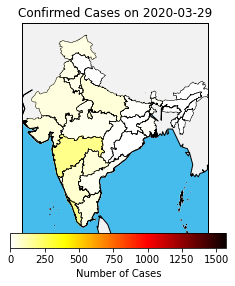

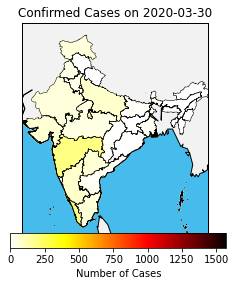

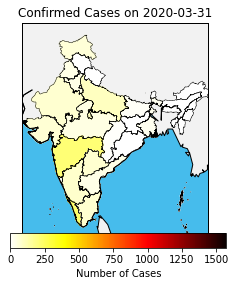

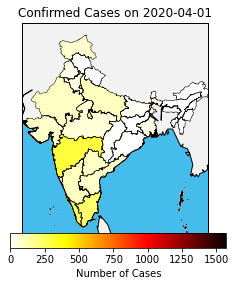

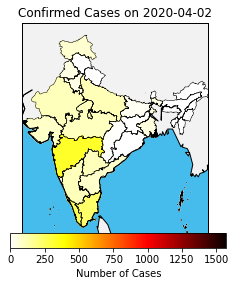

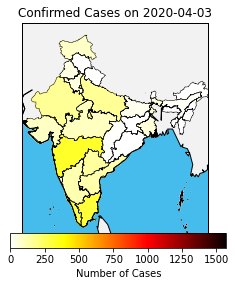

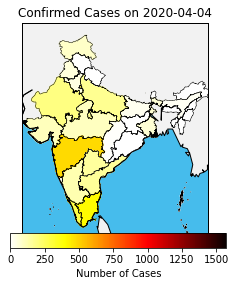

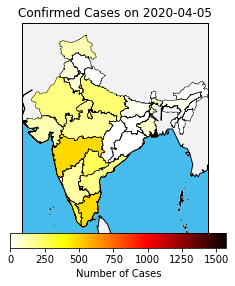

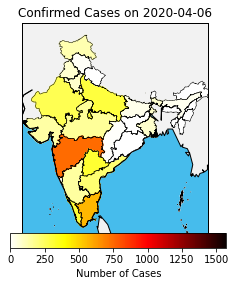

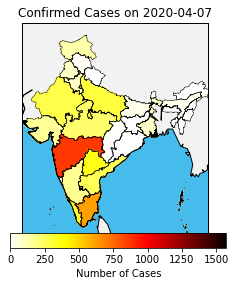

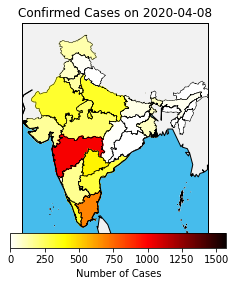

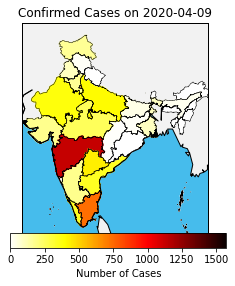

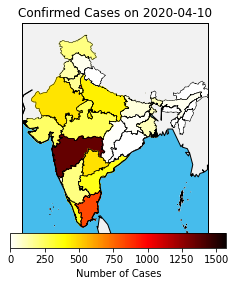

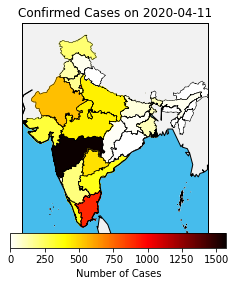

In [7]:
#With Uniform colorbar across images
index = len(data['data'])-1
color_dict_last = {}
color_list = ["Andaman and Nicobar","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Dadra and Nagar Haveli","Daman and Diu","Delhi","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Orissa","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telengana","Tripura","Uttar Pradesh","Uttaranchal","West Bengal",]
for j in range(len(data['data'][index]['regional'])):
    color_dict_last[data['data'][index]['regional'][j]['loc']] = data['data'][index]['regional'][j]['totalConfirmed']
for j in color_list:
  if j not in color_dict_last.keys():
      color_dict_last[j] = 0
#As our coordinates do not incorporate seperation of Ladakh from Jammu & Kashmir
color_dict_last["Jammu and Kashmir"] += color_dict_last["Ladakh"]
del color_dict_last["Ladakh"]

folder = "IMAGES_UNIFORM"
for ind in range(len(data['data'])):
  color_dict = {}
  color_list = ["Andaman and Nicobar","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Dadra and Nagar Haveli","Daman and Diu","Delhi","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Orissa","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telengana","Tripura","Uttar Pradesh","Uttaranchal","West Bengal",]
  for j in range(len(data['data'][ind]['regional'])):
      color_dict[data['data'][ind]['regional'][j]['loc']] = data['data'][ind]['regional'][j]['totalConfirmed']
  for j in color_list:
    if j not in color_dict.keys():
      color_dict[j] = 0
  #As our coordinates do not incorporate seperation of Ladakh from Jammu & Kashmir
  color_dict["Jammu and Kashmir"] += color_dict["Ladakh"]
  del color_dict["Ladakh"] 

  fig, ax = plt.subplots()
  #Obtain position coordinates from https://boundingbox.klokantech.com/
  m = Basemap(resolution='c',projection='merc',lat_0=54.5,lon_0=-4.36,llcrnrlon=68., llcrnrlat=6., urcrnrlat=37., urcrnrlon=97.)
  m.drawmapboundary(fill_color='#46bcec')
  m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
  m.drawcoastlines()
  #contains all state position coordinates
  m.readshapefile("IND_adm1","INDIA")

  colors={}
  statenames=[]
  patches = []
  #Reversed Color Map
  cmap = plt.cm.get_cmap('hot_r')
  vmin = min(color_dict.values()); vmax = max(color_dict_last.values())
  #Colorbar Range
  norm = Normalize(vmin=vmin, vmax=vmax)
  # color mapper to covert values to colors
  mapper = ScalarMappable(norm=norm, cmap=cmap)

  for shapedict in m.INDIA_info:
      statename = shapedict['NAME_1']
      #To incorporate difference between Map State Name and Data Loc Name
      if statename == "Telangana":
        statename = "Telengana"
      if statename in color_dict:
          pop = color_dict[statename]
          colors[statename] = mapper.to_rgba(pop)
          statenames.append(statename)

  for nshape,seg in enumerate(m.INDIA):
      color = rgb2hex(colors[statenames[nshape]]) 
      poly = Polygon(seg,facecolor=color,edgecolor=color)
      ax.add_patch(poly)
  plt.title('Confirmed Cases on '+ data['data'][ind]['day'])

  cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon
  cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
  cb.ax.set_xlabel('Number of Cases')
  fig1 = plt.gcf()
  plt.show()
  fig1.savefig(folder + "/file%02d.png" % ind)

video_name = 'time_map_uniform.avi'

images = [img for img in os.listdir(folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in sorted(images):
    video.write(cv2.imread(os.path.join(folder, image)))

cv2.destroyAllWindows()
video.release()